<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyse-de-données-exploratoire" data-toc-modified-id="Analyse-de-données-exploratoire-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyse de données exploratoire</a></span><ul class="toc-item"><li><span><a href="#Chargement-des-librairies-utiles" data-toc-modified-id="Chargement-des-librairies-utiles-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Chargement des librairies utiles</a></span></li><li><span><a href="#Lecture-de-la-donnée" data-toc-modified-id="Lecture-de-la-donnée-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Lecture de la donnée</a></span></li><li><span><a href="#Décrire-la-donnée" data-toc-modified-id="Décrire-la-donnée-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Décrire la donnée</a></span></li><li><span><a href="#Vérifier-les-dimensions-et-les-colonnes-présentes" data-toc-modified-id="Vérifier-les-dimensions-et-les-colonnes-présentes-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Vérifier les dimensions et les colonnes présentes</a></span></li><li><span><a href="#Vérifier-la-présence-de-valeurs-manquantes" data-toc-modified-id="Vérifier-la-présence-de-valeurs-manquantes-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Vérifier la présence de valeurs manquantes</a></span></li><li><span><a href="#Visualisation-des-données-qualitatives-à-l'aide-de-barplots" data-toc-modified-id="Visualisation-des-données-qualitatives-à-l'aide-de-barplots-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Visualisation des données qualitatives à l'aide de barplots</a></span></li><li><span><a href="#Analyse-bivariée" data-toc-modified-id="Analyse-bivariée-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Analyse bivariée</a></span></li></ul></li><li><span><a href="#Préparation-des-donées" data-toc-modified-id="Préparation-des-donées-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Préparation des donées</a></span><ul class="toc-item"><li><span><a href="#OneHotEncoding-ou-OrdinalEncoding-des-variables-explicatives" data-toc-modified-id="OneHotEncoding-ou-OrdinalEncoding-des-variables-explicatives-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>OneHotEncoding ou OrdinalEncoding des variables explicatives</a></span></li><li><span><a href="#Séparation-de-la-donnée" data-toc-modified-id="Séparation-de-la-donnée-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Séparation de la donnée</a></span></li><li><span><a href="#Mettez-à-la-même-echelle-les-variables-numériques" data-toc-modified-id="Mettez-à-la-même-echelle-les-variables-numériques-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Mettez à la même echelle les variables numériques</a></span></li></ul></li><li><span><a href="#Modèle-simple" data-toc-modified-id="Modèle-simple-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modèle simple</a></span></li></ul></div>

# <center>Prédiction de la Performance Académique des Etudiants à l'Université</center>

![](https://neurosciencenews.com/files/2023/08/chatgpt-student-writing-neuroscoienc.jpg)

## Analyse de données exploratoire

### Chargement des librairies utiles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

### Lecture de la donnée

In [72]:
# charger le fichier data/education.csv et afficher les 5 premières lignes
education_df = pd.read_csv("data/education.csv")
education_df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


<b><p>Attributs</p></b>
1 Gender - sexe de l'étudiant (nominal : « Homme » ou « Femme »)

2 Nqtionqlity - nationalité de l'étudiant (nominal : « Koweït », « Liban », « Égypte », « Arabie Saoudite », « États-Unis », « Jordanie », « Venezuela », « Iran », « Tunis », « Maroc », « Syrie »). ',' Palestine', 'Irak', 'Lybie')

3 Place of birth - Lieu de naissance de l'étudiant (nominal : « Koweït », « Liban », « Égypte », « Arabie Saoudite », « États-Unis », « Jordanie », « Venezuela », « Iran », « Tunis », « Maroc »). ',' Syrie ',' Palestine ', ' Irak ', ' Libye ')

4 Educational Stages - le niveau d'éducation auquel appartient l'élève (nominal : « niveau inférieur », « MiddleSchool », « HighSchool »)

5 Grade Levels : l'élève appartient (nominal : 'G-01', 'G-02', 'G-03', 'G-04', 'G-05', 'G-06', 'G-07' ', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12')

6 Section ID - l'élève de la classe appartient (nominal : 'A', 'B', 'C')

7 Topic- sujet du cours (nominal : 'anglais', 'espagnol', 'français', 'arabe', 'informatique', 'mathématiques', 'chimie', 'biologie', 'science', 'histoire', 'Coran ',' Géologie')

8 Semester - semestre de l'année scolaire (nominal : « Premier », « Deuxième »)

9 Relation - Parent responsable de l’élève (nominal : « maman », « père »)

10 Raisedhqnds - combien de fois l'élève lève la main en classe (numérique : 0-100)

11- VisiTedResources - combien de fois l'étudiant visite un contenu de cours (numérique : 0-100)

12 AnnouncementsView - combien de fois l'étudiant vérifie les nouvelles annonces (numérique : 0-100)

13 Discussion  - combien de fois l'étudiant participe à des groupes de discussion (numérique : 0-100)

14 ParentAnsweringSurvey - le parent a répondu aux enquêtes fournies ou non par l'école (nominal : « Oui », « Non »)

15 ParentschoolSatisfaction - le degré de satisfaction des parents à l'égard de l'école (nominal : « Oui », « Non »)

16 StudentAbsenceDays - le nombre de jours d'absence pour chaque étudiant (nominal : au-dessus de 7 ans, moins de 7 ans)

17 Class - Les étudiants sont classés en trois intervalles numériques en fonction de leur note/note totale :
Low-Level (L): l'intervalle comprend des valeurs de 0 à 69,

Middle-Level (M): l'intervalle comprend les valeurs de 70 à 89,

High-Level(H) : l'intervalle comprend des valeurs comprises entre 90 et 100.

### Décrire la donnée


In [4]:
education_df.describe(include="all")

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


### Vérifier les dimensions et les colonnes présentes

In [10]:
print("Les dimension du dataset -----> ", education_df.shape, "\n")
print("Colonnes du dataset : ")
print("-"*20)
for i in education_df.columns:
    print(i)

Les dimension du dataset ----->  (480, 17) 

Colonnes du dataset : 
--------------------
gender
NationalITy
PlaceofBirth
StageID
GradeID
SectionID
Topic
Semester
Relation
raisedhands
VisITedResources
AnnouncementsView
Discussion
ParentAnsweringSurvey
ParentschoolSatisfaction
StudentAbsenceDays
Class


### Vérifier la présence de valeurs manquantes

In [12]:
print(education_df.isna().sum(),"\n")
print("Total de valeurs manquantes : ", education_df.isna().sum().sum())

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64 

Total de valeurs manquantes :  0


### Visualisation des données qualitatives à l'aide de barplots

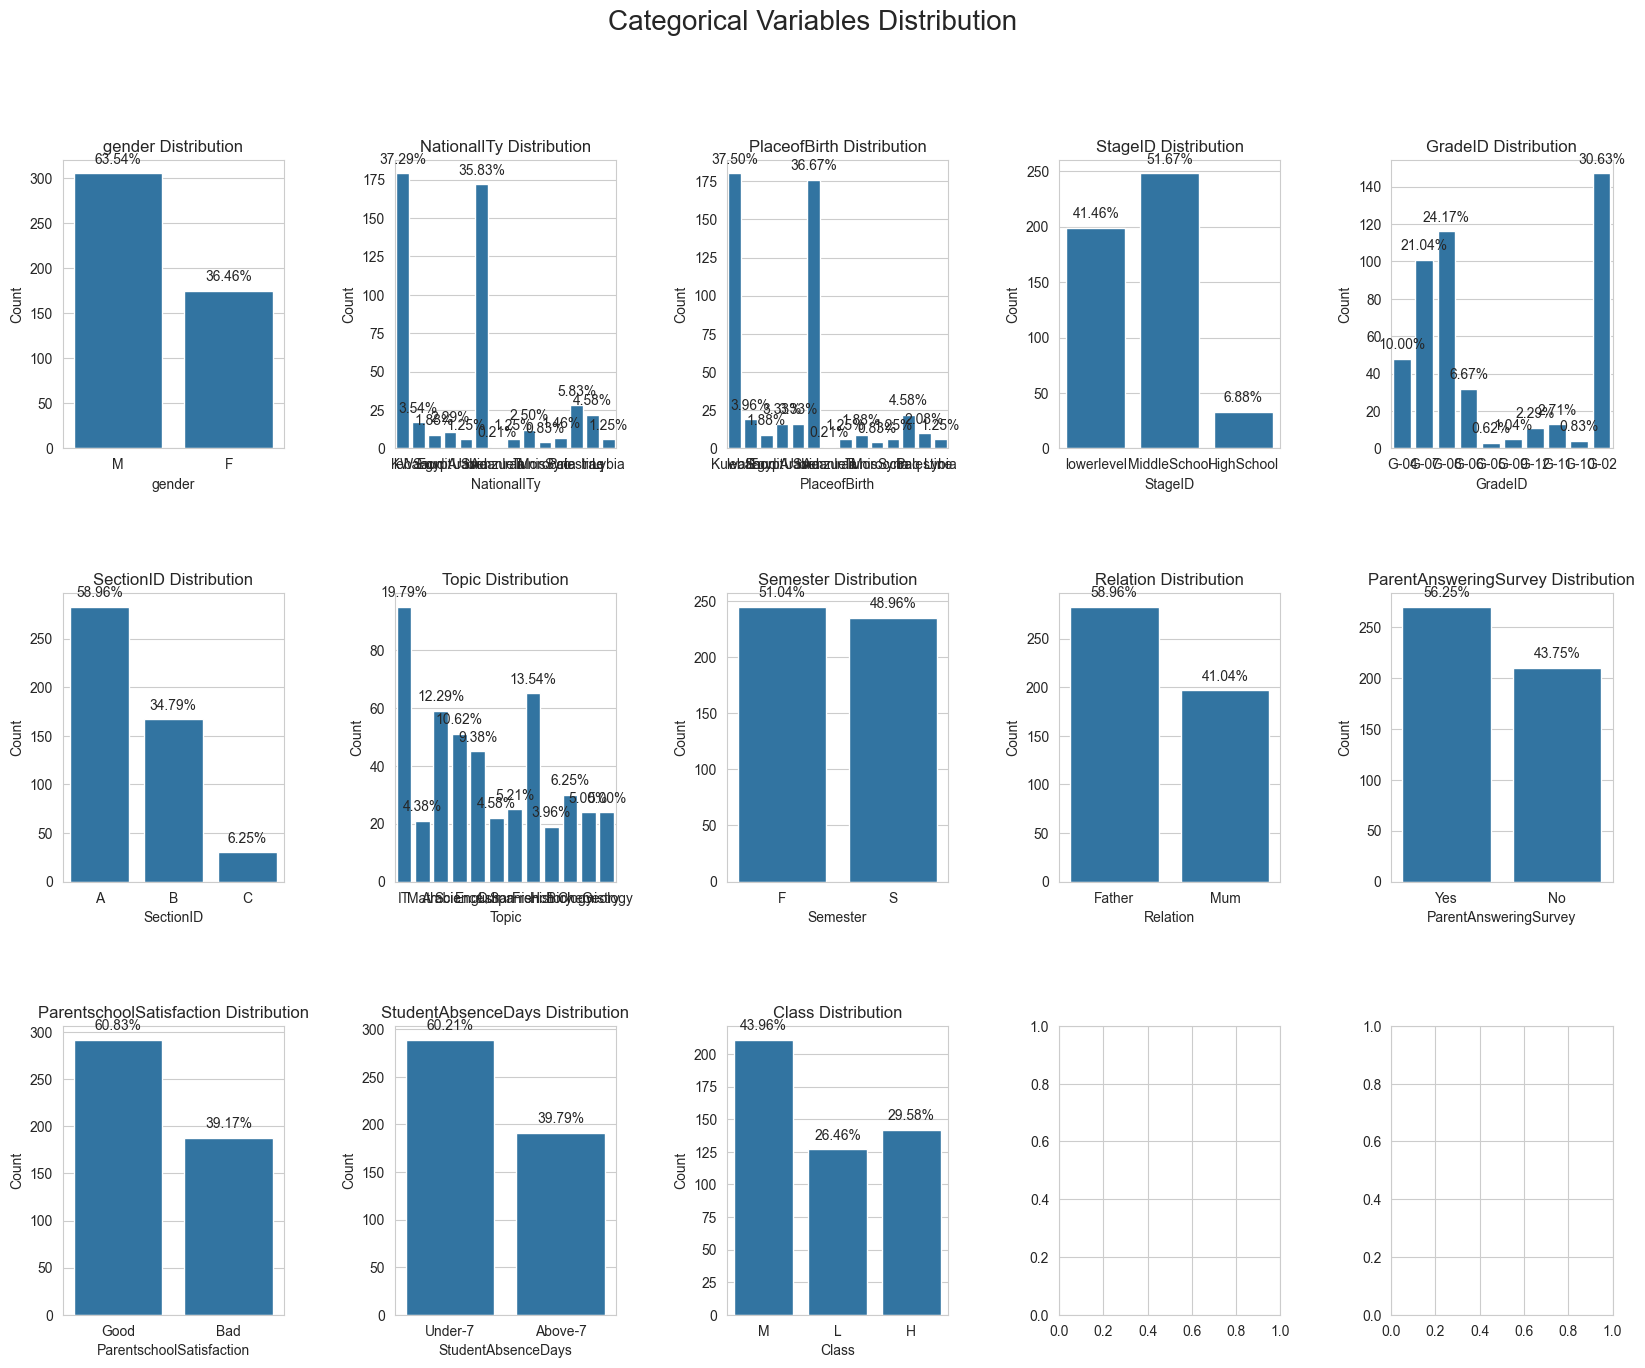

In [7]:
# Subplots de barplots pour les variables catégorielles avec des labels en pourcentage au-dessus des barres




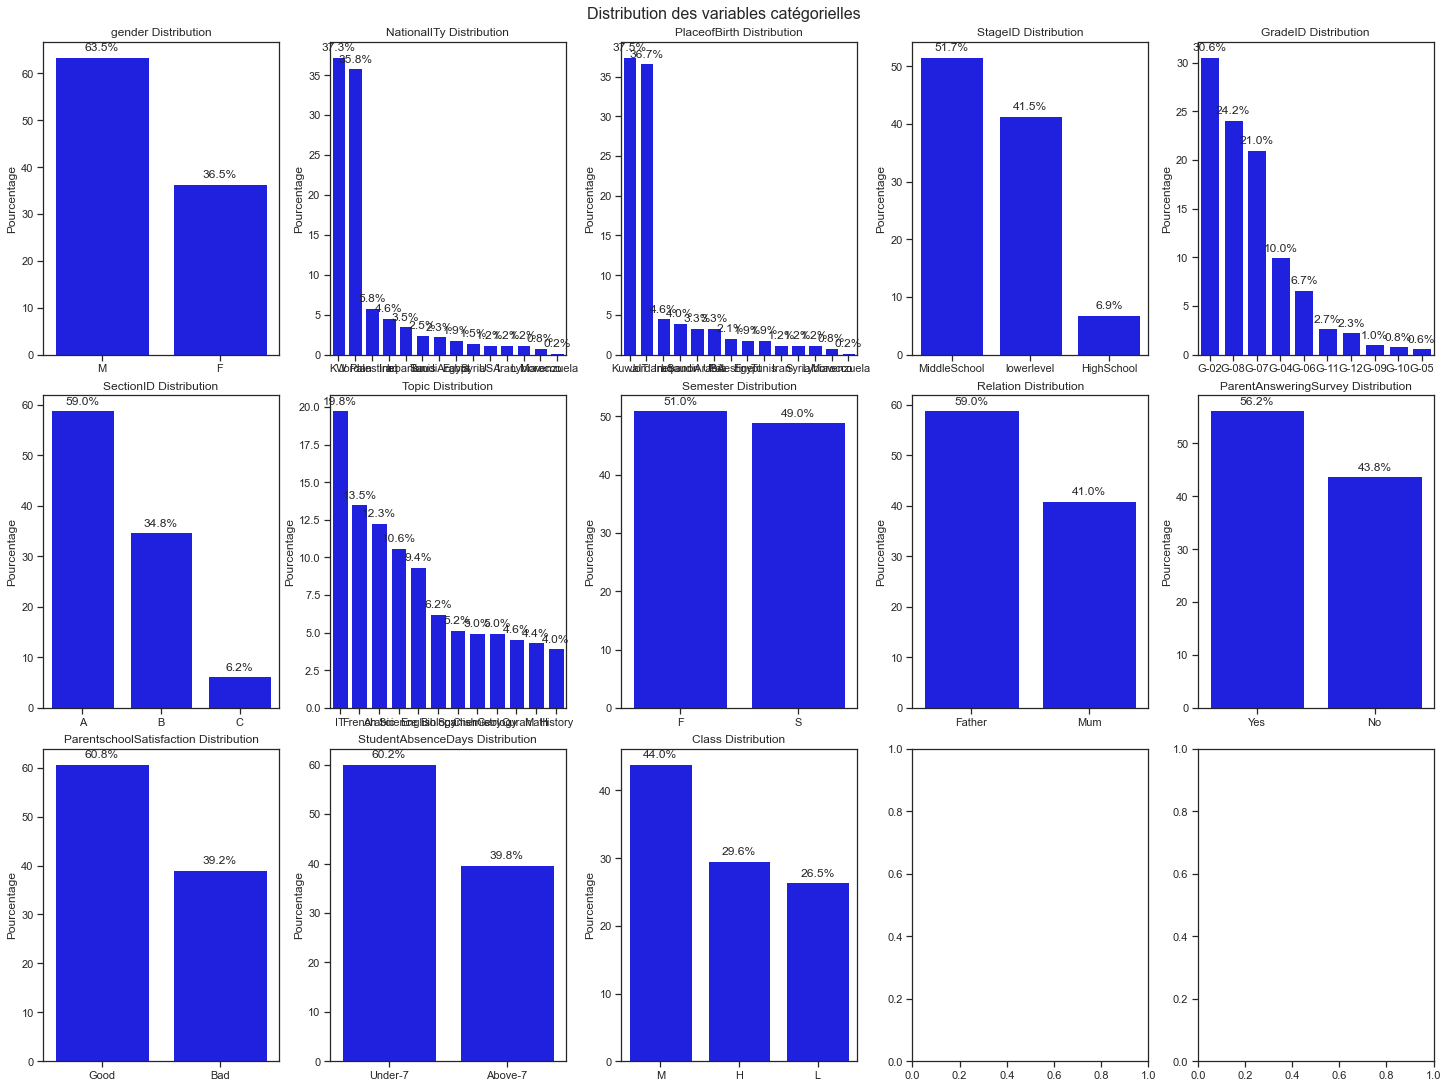

In [43]:
categorical_columns = education_df.select_dtypes(include=['object', 'category']).columns
fig, axes = plt.subplots(3, 5, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()

# Boucle pour créer chaque subplot
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    value_counts = education_df[col].value_counts(normalize=True) * 100 
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, color='blue')
    ax.set_title(f'{col} Distribution')
    ax.set_ylabel('Pourcentage')
    ax.set_xlabel('')

    # labels en pourcentage 
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')


plt.suptitle('Distribution des variables catégorielles', size=16)
plt.show()


### Analyse bivariée

# Etudier la relation entre chaque variable et la variable d'intérêt


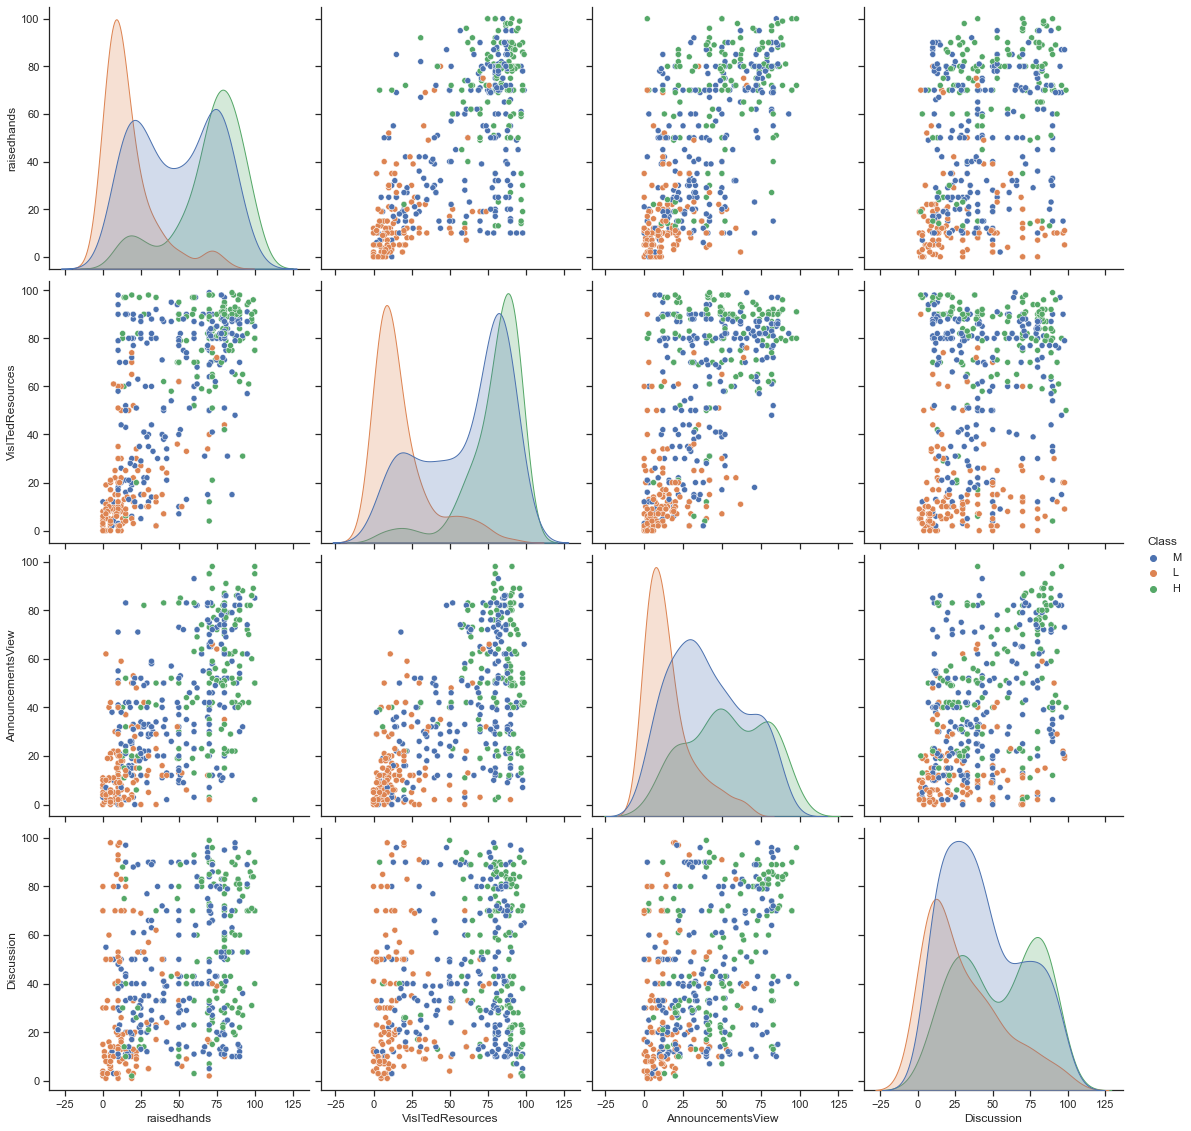

In [73]:
# Réaliser un pairplot pour les variables numériques avec la variable target en hue
sns.set_theme(style="ticks")
numerical_columns = education_df.select_dtypes(include=['float','int']).columns
sns.pairplot(education_df, vars=numerical_columns, hue='Class', height=4)
plt.show()


## Préparation des données

### OneHotEncoding ou OrdinalEncoding des variables explicatives

In [74]:
# encodez les variables catégorielles
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
education_df[categorical_columns] = encoder.fit_transform(education_df[categorical_columns])

In [75]:
education_df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1.0,4.0,4.0,2.0,1.0,0.0,7.0,0.0,0.0,15,16,2,20,1.0,1.0,1.0,2.0
1,1.0,4.0,4.0,2.0,1.0,0.0,7.0,0.0,0.0,20,20,3,25,1.0,1.0,1.0,2.0
2,1.0,4.0,4.0,2.0,1.0,0.0,7.0,0.0,0.0,10,7,0,30,0.0,0.0,0.0,1.0
3,1.0,4.0,4.0,2.0,1.0,0.0,7.0,0.0,0.0,30,25,5,35,0.0,0.0,0.0,1.0
4,1.0,4.0,4.0,2.0,1.0,0.0,7.0,0.0,0.0,40,50,12,50,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.0,3.0,3.0,1.0,5.0,0.0,2.0,1.0,0.0,5,4,5,8,0.0,0.0,0.0,1.0
476,0.0,3.0,3.0,1.0,5.0,0.0,5.0,0.0,0.0,50,77,14,28,0.0,0.0,1.0,2.0
477,0.0,3.0,3.0,1.0,5.0,0.0,5.0,1.0,0.0,55,74,25,29,0.0,0.0,1.0,2.0
478,0.0,3.0,3.0,1.0,5.0,0.0,6.0,0.0,0.0,30,17,14,57,0.0,0.0,0.0,1.0


### Séparation de la donnée

In [55]:
# Séparer les données en features et target
Features, Target = education_df.drop(columns='Class'), education_df['Class']

In [65]:
# Diviser les données en train(60%), validation(20%) et test(20%)
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [67]:
print(X_train.shape, X_test.shape, X_val.shape)

(307, 16) (96, 16) (77, 16)


### Mettez à la même echelle les variables numériques

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])


In [77]:
X_train

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
246,0.0,4.0,4.0,1.0,3.0,0.0,10.0,1.0,0.0,1.067885,1.151381,0.882259,1.201853,1.0,1.0,1.0
345,0.0,3.0,3.0,2.0,0.0,1.0,4.0,0.0,1.0,-1.109702,0.790109,-0.668006,-0.521958,0.0,1.0,1.0
242,1.0,4.0,4.0,1.0,4.0,1.0,10.0,1.0,0.0,-0.817191,-1.076459,-0.741828,-1.402202,0.0,0.0,0.0
74,1.0,4.0,4.0,1.0,4.0,1.0,7.0,0.0,0.0,-1.142204,-1.678578,-1.184761,-1.145464,0.0,0.0,1.0
51,1.0,4.0,4.0,0.0,9.0,0.0,3.0,0.0,0.0,-0.264669,-1.226989,-0.815651,0.211579,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1.0,4.0,4.0,2.0,1.0,0.0,6.0,1.0,0.0,-1.207206,-1.166777,-0.963295,-0.155190,1.0,1.0,1.0
369,0.0,7.0,3.0,2.0,0.0,0.0,0.0,1.0,1.0,0.905378,0.760003,0.476237,-0.375251,0.0,1.0,1.0
135,0.0,0.0,0.0,1.0,4.0,0.0,9.0,1.0,1.0,0.742872,0.729897,2.100324,0.945115,1.0,1.0,1.0
344,0.0,3.0,3.0,2.0,0.0,1.0,4.0,0.0,1.0,-1.077201,1.241698,-0.852562,-1.108787,0.0,1.0,1.0


## Modèle simple

In [83]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

c:\Users\zumso\Documents\envDecisionTree\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\zumso\Documents\envDecisionTree\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zumso\Documents\envDecisionTree\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F

In [84]:
print(Score)

0.22916666666666666


In [85]:
print(Report)

              precision    recall  f1-score   support

         0.0       0.23      1.00      0.37        22
         1.0       0.00      0.00      0.00        26
         2.0       0.00      0.00      0.00        48

    accuracy                           0.23        96
   macro avg       0.08      0.33      0.12        96
weighted avg       0.05      0.23      0.09        96

